# Assignment 10-1

###  10.1.a - Create a tokenize function

In [1]:
import string

In [2]:
def tokenize(sentence):
    # Split the sentence by spaces
    words = sentence.split()
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    return stripped

In [3]:
sentence = "This is my sentence, to parse. Get all punctuation out# of here!"
tokens = tokenize(sentence)
print(type(tokens))
print(tokens)

<class 'list'>
['This', 'is', 'my', 'sentence', 'to', 'parse', 'Get', 'all', 'punctuation', 'out', 'of', 'here']


### Assignment 10.1 b

In [4]:
! pip install nltk

In [5]:
import nltk

In [6]:
def ngram(paragraph, n):
    # Split the sentence by spaces
    words = paragraph.split()
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    bi_grams = nltk.ngrams(stripped, n)
    return bi_grams

In [7]:
paragraph = "This is my sentence, to parse. Get all punctuation out# of here!"
bi_grams = ngram(paragraph, 3)
for gram in bi_grams:
    print(gram)

('This', 'is', 'my')
('is', 'my', 'sentence')
('my', 'sentence', 'to')
('sentence', 'to', 'parse')
('to', 'parse', 'Get')
('parse', 'Get', 'all')
('Get', 'all', 'punctuation')
('all', 'punctuation', 'out')
('punctuation', 'out', 'of')
('out', 'of', 'here')


### Assignment 10.1 c - Create a Vector

In [8]:
import string
import nltk
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

In [9]:
def onehtencode(data):
    data = array(data)
    print("Received array")
    print(data)
    # one hot encode
    encoded = to_categorical(data)
    return encoded

In [10]:
data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
encodedval = onehtencode(data)
print("One Hot Encoded values")
print(encodedval)

Received array
[1 3 2 0 3 2 2 1 0 1]
One Hot Encoded values
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


# Assignment 10-2

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from contextlib import redirect_stdout
import time
start_time = time.time()

In [12]:
results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)
imdb_dir = Path('imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test')
train_dir = os.path.join(imdb_dir, 'train')

In [13]:
training_samples = 200
maxlen = 100
max_words = 1000
embedding_dim = 100

training_samples = 200
validation_samples = 10000

In [16]:
# Process the labels of the raw IMDB data
import os

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [17]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [18]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [19]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Save the summary to file
summary_file = results_dir.joinpath('Assignment_10.2_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

result_model_file = results_dir.joinpath('pre_trained_glove_model.h5')
model.save_weights(result_model_file)

Epoch 1/10
7/7 [==============================] - 1s 121ms/step - loss: 0.6991 - acc: 0.4700 - val_loss: 0.6913 - val_acc: 0.5177
Epoch 2/10
7/7 [==============================] - 1s 97ms/step - loss: 0.5254 - acc: 0.9400 - val_loss: 0.6942 - val_acc: 0.5128
Epoch 3/10
7/7 [==============================] - 1s 107ms/step - loss: 0.3390 - acc: 0.9900 - val_loss: 0.7003 - val_acc: 0.5212
Epoch 4/10
7/7 [==============================] - 1s 109ms/step - loss: 0.1919 - acc: 1.0000 - val_loss: 0.7016 - val_acc: 0.5281
Epoch 5/10
7/7 [==============================] - 1s 106ms/step - loss: 0.1017 - acc: 1.0000 - val_loss: 0.7111 - val_acc: 0.5293
Epoch 6/10
7/7 [==============================] - 1s 103ms/step - loss: 0.0576 - acc: 1.0000 - val_loss: 0.7171 - val_acc: 0.5289
Epoch 7/10
7/7 [==============================] - 1s 108ms/step - loss: 0.0324 - acc: 1.0000 - val_loss: 0.7437 - val_acc: 0.5240
Epoch 8/10
7/7 [==============================] - 1s 109ms/step - loss: 0.0200 - acc: 1.000

AttributeError: 'PosixPath' object has no attribute 'endswith'

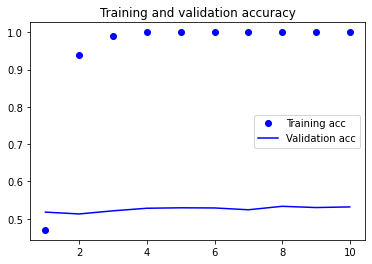

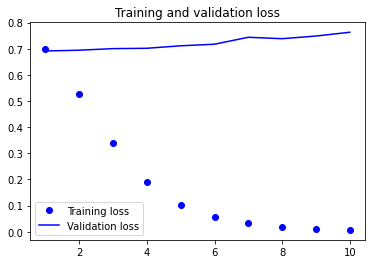

In [21]:
# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.2_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()

In [28]:
import os

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels=[]
texts=[]

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequence = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model.load_weights(result_model_file)
eval = model.evaluate(x_test, y_test)
print("")
print(eval)
print("Complete: --- %s seconds has passed ---" % (time.time() - start_time))

AttributeError: 'PosixPath' object has no attribute 'endswith'

# Assignment 10-3

In [25]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from contextlib import redirect_stdout
import time
start_time = time.time()
from keras.layers import LSTM
# Needed the following as caused CUDA DNN errors
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

from keras.datasets import imdb
from keras.preprocessing import sequence

Instructions for updating:
non-resource variables are not supported in the long term


In [26]:
imdb_dir = Path('/home/jovyan/dsc650/data/external/imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test')
train_dir = os.path.join(imdb_dir, 'train')

results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)

In [27]:
max_features = 10000
maxlen = 500
batch_size = 32
max_words = 1000
training_samples = 200
validation_samples = 10000

In [29]:
import os

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [30]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

print('Loading data... ')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Loading data... 
Found 87393 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)


In [31]:
#x_train
input_train = data[:training_samples]
#y_train
y_train = labels[:training_samples]

#x_val
input_test = data[training_samples: training_samples + validation_samples]
#y_val
y_test = labels[training_samples: training_samples + validation_samples]

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (200, 500)
input_test shape: (10000, 500)


In [32]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(input_train, y_train, epochs=10, batch_size=32, validation_data=(input_test, y_test))

result_model_file = results_dir.joinpath('pre_trained_glove_model_LSTM.h5')
model.save_weights(result_model_file)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 27s 135ms/sample - loss: 0.6942 - acc: 0.5050 - val_loss: 0.6928 - val_acc: 0.5230
Epoch 2/10
200/200 [==============================] - 24s 118ms/sample - loss: 0.6886 - acc: 0.6700 - val_loss: 0.6920 - val_acc: 0.5325
Epoch 3/10
200/200 [==============================] - 21s 107ms/sample - loss: 0.6811 - acc: 0.7900 - val_loss: 0.6899 - val_acc: 0.5696
Epoch 4/10
200/200 [==============================] - 20s 100ms/sample - loss: 0.6654 - acc: 0.8450 - val_loss: 0.6852 - val_acc: 0.5835
Epoch 5/10
200/200 [==============================] - 18s 92ms/sample - loss: 0.6267 - acc: 0.8400 - val_loss: 0.6615 - val_acc: 0.5906
Epoch 6/10
200/200 [==============================] - 18s 91ms/sample

AttributeError: 'PosixPath' object has no attribute 'endswith'

In [33]:
# Save the summary to file
summary_file = results_dir.joinpath('Assignment_10.3_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

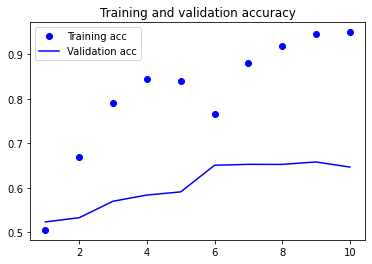

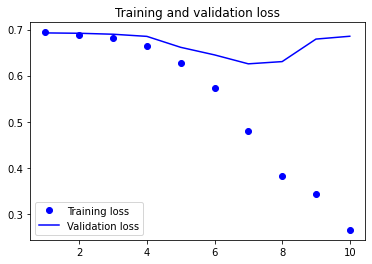

In [34]:
# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.3_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()

# Assignment 10-4

In [35]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
tf.disable_v2_behavior()

In [36]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.datasets import imdb
from keras.preprocessing import sequence
from contextlib import redirect_stdout
from pathlib import Path
import time
start_time = time.time()

In [37]:
results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)

In [38]:
max_features = 10000
max_len = 500

print('Loading data ...')

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data ...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [39]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [40]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 497us/sample - loss: 0.7302 - acc: 0.5252 - val_loss: 0.6837 - val_acc: 0.5930
Epoch 2/10
20000/20000 [==============================] - 10s 491us/sample - loss: 0.6645 - acc: 0.6702 - val_loss: 0.6602 - val_acc: 0.6762
Epoch 3/10
20000/20000 [==============================] - 10s 509us/sample - loss: 0.6198 - acc: 0.7692 - val_loss: 0.6056 - val_acc: 0.7402
Epoch 4/10
20000/20000 [==============================] - 10s 499us/sample - loss: 0.5278 - acc: 0.8163 - val_loss: 0.4961 - val_acc: 0.8078
Epoch 5/10
20000/20000 [==============================] - 10s 495us/sample - loss: 0.4111 - acc: 0.8503 - val_loss: 0.4123 - val_acc: 0.8404
Epoch 6/10
20000/20000 [==============================] - 10s 493us/sample - loss: 0.3401 - acc: 0.8788 - val_loss: 0.4034 - val_acc: 0.8538
Epoch 7/10
20000/20000 [==============================] - 10s 485us/sample - loss: 0.2948 - acc: 0.8929 -

In [41]:
# Save the summary to file
summary_file = results_dir.joinpath('Assignment_10.4_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [42]:
result_model_file = results_dir.joinpath('pre_trained_glove_model_1D_Convnet.h5')
model.save_weights(result_model_file)

AttributeError: 'PosixPath' object has no attribute 'endswith'

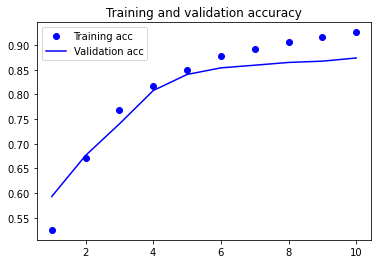

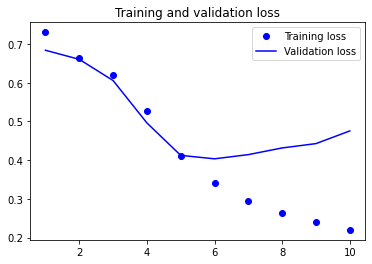

In [43]:
# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.4_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()

In [44]:
#save the model performance metrics and training and validation accuracy curves in the results/model_2 direc
model.load_weights(result_model_file)
eval = model.evaluate(x_test, y_test)
print("")
print(eval)


AttributeError: 'PosixPath' object has no attribute 'endswith'